<h1>
    Thermodynamics of Materials AD19: <br>
    <b>Class Activity 02</b>
</h1>

<table width="75%" align="center">
    <tr>
        <th align="left" colspan="2">
            <h2><b>Team<b>:</b></h2>
        </th>
    </tr>
    <tr>
        <td><h3>Antonio Osamu Katagiri Tanaka</h3></td>
        <td><h4>A01212611@itesm.mx</h4></td>
    </tr>
    <tr>
        <td><h3>Angel Manuel Villalba Rodríguez</h3></td>
        <td><h4>A00828035@itesm.mx</h4></td>
    </tr>
</table>

<h2>S.Leharne, "<b>The physical chemistry of high-sensitivity differential scanning calorimetry of biopolymers</b>" ChemTexts (2017) 3:1</h2>

In [1]:
# PYTHON LIBRARIES
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as st
import scipy.signal as sg
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)

from matplotlib import colors as mcolors
from matplotlib.collections import LineCollection
from math import factorial, log
from scipy import special, optimize
from IPython.display import display, Image
from statsmodels.stats.outliers_influence import summary_table

# DATA
data_df = pd.read_csv("./fig1_data.txt", delimiter=",");
print(data_df.head())

data_df = data_df.sort_values(by=['T']);
data_T  = data_df.iloc[:]['T'];
data_c  = data_df.iloc[:]['C'];
T = np.array(data_T);
C = np.array(data_c);

        T     C
0  300.16  0.07
1  301.12  0.15
2  302.09  0.16
3  303.06  0.16
4  304.02  0.14


Equation 21:

$$ K(T) = e^{\frac{\Delta H_{vH,ref}}{R} \left(\frac{1}{T_{ref}} - \frac{1}{T}\right) + \frac{\Delta C_P}{R} \left(ln\left(\frac{T}{T_{ref}}\right) + \frac{T_{ref}}{T} - 1\right)} $$

In [2]:
#eq 21
def K_(T, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp):
    # x = [T, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp]
    
    _T = T;
    _T_ref = T_ref; # temperature at maximum Cp
    _Delta_v_ref = Delta_v_ref; # from the class table
    _R = 8.314/1000;
    _Delta_Cp = Delta_Cp;
    
    res = np.exp((_Delta_v_ref/_R)*((1/_T_ref)-(1/_T)) + (_Delta_Cp/_R) * (np.log(_T/_T_ref) + (_T_ref/_T) - 1) );
    return res

Equation 18:

$$ f_D = f(T) = \frac{K(T)}{1 + K(T)} $$

In [3]:
#eq 18
def f_(T, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp):
    return (K_(T, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp))/(1 + K_(T, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp));

$$ C_P = \frac{\Delta_{cal} H \Delta_{vH} H}{R T^2} f(T) (1 - f(T)) + f(T) \frac{\Delta_{cal} H_{ref}}{\Delta_{vH} H_{ref}} \Delta C_P $$

In [4]:
#eq
def C_(T, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp):
    # x = [Delta_cal, Delta_v, T_ref, Delta_Cp]
    
    _Delta_cal = 200
    _Delta_v = 200
    
    _T = T;
    _Delta_cal_ref = Delta_cal_ref
    _Delta_v_ref = Delta_v_ref
    _Delta_Cp = Delta_Cp;
    _R = 8.314/1000;
    
    return (((_Delta_cal * _Delta_v)/(_R * _T**2)) * f_(T, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp) * (1 - f_(T, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp))) + (f_(T, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp)*(_Delta_cal_ref/_Delta_v_ref) * _Delta_Cp);

In [5]:
# Data to plot fit curve
# x = [Delta_cal, Delta_v, T_ref, Delta_Cp]
# x = np.array([T, 220.0, 190.0, 330.0, 3.0])


In [14]:
# reasonable initial guesses for EOS parameters
Delta_cal_ref = 150
Delta_v_ref = 150
T_ref = 320
Delta_Cp = 3
p0 = Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp
C_fit = C_(T, Delta_cal_ref, Delta_v_ref, T_ref, Delta_Cp);

results = optimize.curve_fit(C_, T, C, p0)
print(results[0])
C_fit_2 = C_(T, results[0][0], results[0][1], results[0][2], results[0][3]);

[491.88204266 210.23668152 329.85935464   1.38675705]


Fitting parameters: <br>
    Delta_cal_H_ref = 491.88204266; <br>
    Delta_v_H_ref = 210.23668152; <br>
    T_ref = 329.85935464; <br>
    Delta_Cp = 1.38675705;

<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

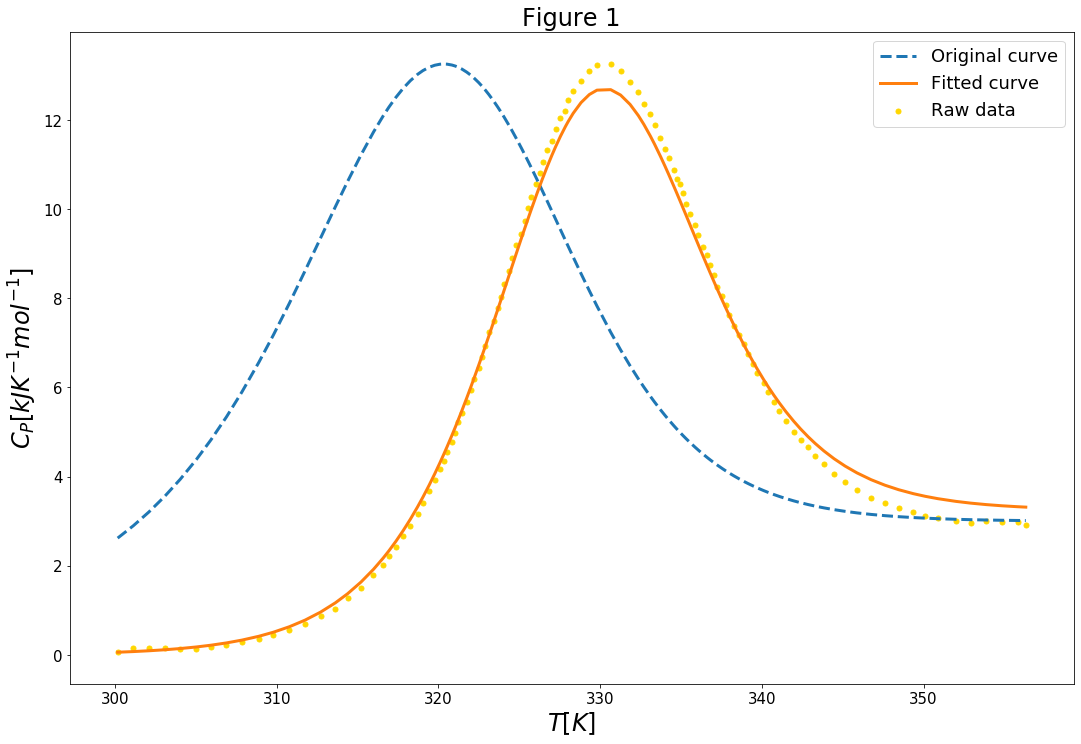

In [19]:
# PLOT
scale = 6;
plt.subplots(figsize=(3*scale, 2*scale));

# Plot
plt.plot(T, C_fit, '--', linewidth=3, label='Original curve')
plt.plot(T, C_fit_2, '-', linewidth=3, label='Fitted curve')
plt.scatter(T, C, s=25, color='gold', label='Raw data');

# Display plots
plt.yscale('linear');
plt.xlabel(r'$T [K]$', fontsize=24);
plt.ylabel(r'$C_P [kJ K^{-1} mol^{-1}]$', fontsize=24);
plt.title('Figure 1', size=24);
plt.legend(prop={'size': 18});
display(plt);